In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline

In [ ]:
df_temp = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df1_test = pd.DataFrame()
df2_test = pd.DataFrame()

In [ ]:
train_start = 1
train_end = 10
train_step = 1

In [ ]:
test_start = 11
test_end = 13
test_step = 1

In [ ]:
for i in range(train_start,train_end+1,train_step):
  df_temp = pd.read_csv('/content/drive/My Drive/BTP/Images/p'+str(i)+'/opRGB.csv')
  df1 = df1.append(df_temp)
  df_temp = pd.read_csv('/content/drive/My Drive/BTP/Images/p'+str(i)+'/T_cal.csv')
  df2 = df2.append(df_temp)

In [ ]:
for i in range(test_start,test_end+1,test_step):
  df_temp = pd.read_csv('/content/drive/My Drive/BTP/Images/p'+str(i)+'/opRGB.csv')
  df1_test = df1_test.append(df_temp)
  df_temp = pd.read_csv('/content/drive/My Drive/BTP/Images/p'+str(i)+'/T_cal.csv')
  df2_test = df2_test.append(df_temp)

In [ ]:
print(df1.shape)
print(df2.shape)
print(df1.head())
print(df2.head())

print(df1_test.shape)
print(df2_test.shape)
print(df1_test.head())
print(df2_test.head())

(680944, 3)
(680944, 1)
   R  G  B
0  9  9  9
1  4  4  4
2  1  1  1
3  2  2  2
4  2  2  2
   T_cal
0   1700
1   1700
2   1800
3   1800
4   1800
(153239, 3)
(153239, 1)
   R  G  B
0  7  5  6
1  6  4  5
2  4  2  3
3  3  1  2
4  3  1  2
   T_cal
0   1100
1   1000
2   1000
3   1000
4   1000


In [ ]:
df2['T_cal'].value_counts()

298     604758
1700     33507
1600     15476
1000     10547
1800      9906
1300      2417
1500      1983
1100       893
1400       705
1900       533
2000       187
1200        32
Name: T_cal, dtype: int64

In [ ]:
X = df1[['R', 'G','B']] .values#.astype(float)
X[0:5]

array([[9, 9, 9],
       [4, 4, 4],
       [1, 1, 1],
       [2, 2, 2],
       [2, 2, 2]])

In [ ]:
X_tst = df1_test[['R', 'G','B']] .values#.astype(float)
X_tst[0:5]

array([[7, 5, 6],
       [6, 4, 5],
       [4, 2, 3],
       [3, 1, 2],
       [3, 1, 2]])

In [ ]:
y = df2['T_cal'].values
y[0:]

array([1700, 1700, 1800, ..., 1000, 1000, 1100])

In [ ]:
y_tst = df2_test['T_cal'].values
y_tst[0:]

array([1100, 1000, 1000, ..., 1000, 1000, 1000])

In [ ]:
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#print(X[0:5])
#standard deviation=1 and mean =0

In [ ]:
'''from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.01, random_state=42)
print('Train set:', X_train.shape,  y_train.shape )
print('Test set:', X_test.shape,  y_test.shape)'''

"from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.01, random_state=42)\nprint('Train set:', X_train.shape,  y_train.shape )\nprint('Test set:', X_test.shape,  y_test.shape)"

In [ ]:
X_train = X
X_test = X_tst
y_train = y
y_test = y_tst

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k=9

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(neigh)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')


In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([298, 298, 298, 298, 298])

In [ ]:
y_train[0:]

array([1700, 1700, 1800, ..., 1000, 1000, 1100])

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9352119998120256
Test set Accuracy:  0.9207120902642277


In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat)
print(cnf_matrix)

[[137616     92      0      6      2     48    767    318     95      1]
 [  2618     23      0      5      0      9    154    101     37      0]
 [   227      2      0      0      0      4      4      3      1      0]
 [   324      9      0      1      1     10     94     41      6      0]
 [   155      2      0      1      1     10     58      3      1      0]
 [   472      1      0      1      0     29    191     11      5      0]
 [  2274     45      0     37      8     57   1420    674     51      0]
 [  1277     55      0      5      0      2    467   1829    219      0]
 [   513     14      0      3      0      0     20    489    170      0]
 [    40      0      0      0      0      0      0      7      3      0]]


In [ ]:
#code for finding the best k
#Ks = len(X_train)+1
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.89158765, 0.9106559 , 0.91141289, 0.91549801, 0.91647688,
       0.91890446, 0.9192438 , 0.92028139, 0.92071209])

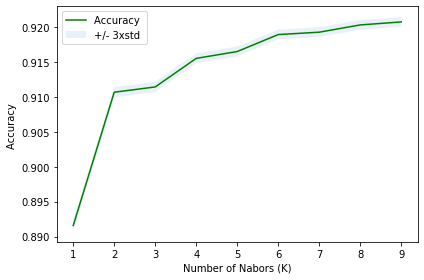

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9207120902642277 with k= 9


Result Generation

In [ ]:
image_start = 1
image_end = 13
image_step = 1

In [ ]:
for i in range(image_start,image_end+1,image_step):
  df_temp = pd.read_csv('/content/drive/My Drive/BTP/Images/p'+str(i)+'/opRGB.csv')
  X_temp = df_temp[['R', 'G','B']] .values
  yhat_temp = neigh.predict(X_temp)
  DF = pd.DataFrame(yhat_temp)
  DF.to_csv('/content/drive/My Drive/BTP/Temp_results/p'+str(i)+'_pred.csv')

In [ ]:
#DF[0].value_counts()

In [ ]:
#df2_test['T_cal'].value_counts()

In [ ]:
df3 = pd.read_csv('/content/drive/My Drive/BTP/Images/p13/T_cal.csv')

In [ ]:
df3['T_cal'].value_counts()

298     46361
1600     1348
1700     1260
1000      952
1800      347
1500      187
1300      147
1400       62
1100       17
1900        8
Name: T_cal, dtype: int64

In [ ]:
df4 = pd.read_csv('/content/drive/My Drive/BTP/Temp_results/p13_pred.csv')

In [ ]:
df4.head()

,Unnamed: 0,0
0,0,298
1,1,298
2,2,298
3,3,298
4,4,298


In [ ]:
df4['0'].value_counts()

298     48607
1700      982
1600      761
1800      206
1000       75
1500       44
1300       13
1900        1
Name: 0, dtype: int64